In [23]:
## Neccessary imports
import numpy as np 
import matplotlib.pyplot as plt
import math
from math import pi as π
import numpy.linalg as LA
from scipy.special import erf

## 10.8.6

Given the data points $(-1,1),(0,1),(1,2),(2,0)$, determine the interpolating cubic polynomial using:
- monomial basis
- Lagrange basis
- Newton basis

### First we will implement the monomial basis.
Monomial interpolation will yield a polynomial itnerpolant of degree at most $n$ for $n+1$ data points
$$
p(x) = p_n(x) = \sum^n_{j=0} c_j x^j = c_0 + c_1 x + ... + c_n x^n.
$$

Since we have $n=4$ datapoints, we want to find 4 coefficients $c_0,c_1,c_2,c_3$ such that
$$
p(x_i) = y_i, \quad i=0,1,2,3.
$$

Assume that the abscissae of the data points are distinct, that is
$$
x_i \neq x_j \quad \textrm{whenever} \quad i \neq j
$$

Thus, we want to fit a polynomial of degree 3 of the form
$$
p(x) = p_3(x) = \sum^3_{j=0} = c_j x^j = c_0 + c_1x + c_2x^2 + c_3x^3.
$$
through our 4 data points.

Let $(x_0,y_0) = (-1,1), (x_1,y_1) = (0,1), (x_2, y_2) = (1,2),$ and $(x_3,y_3) = (2,0)$. Our interpolating conditions are:

$$
p_3 (x_0) = c_0 + c_1(-1) + c_2(-1)^2 + c_3(-1)^3 = c_0 - c_1 + c_2 - c_3 = 1,
$$

$$
p_3(x_1) = c_0 + c_1(0) + c_2(0)^2 + c_3(0)^3 = c_0 = 1,
$$

$$
p_3(x_2) = c_0 + c_1(1) + c_2(1)^2 + c_3(1)^3 = c_0 + c_1 +c_2 + c_3= 2,
$$

$$
p_3(x_3) = c_0 + c_1(2) + c_2(2)^2 + c_3(2)^3 = c_0 + 2c_1 + 4c_2 + 8c_3 =  0.
$$

From above we see that $c_0 =1$ So we can eliminate equation $p_3(x_1)$ and write our new system of linear equations as:
$$
p_3(x_0) = - c_1 + c_2 - c_3  = 0
$$

$$
p_3(x_2) = c_1 + c_2 + c_3 = 1
$$

$$
p_3(x_3) = 2c_1 + 4c_2 + 8c_3 = -1
$$
Putting this into a matrix-vector equation to perform Gauss-Jordan

$$
\begin{bmatrix}
-1 & 1 & -1 \\ 1 & 1 & 1 \\ 2 & 4 & 8 
\end{bmatrix}
\begin{pmatrix}
c_1 \\ c_2 \\ c_3
\end{pmatrix}
=
\begin{pmatrix}
0 \\ 1 \\ -1
\end{pmatrix}
$$
we construct the augmented matrix
$$
\begin{bmatrix}
-1 & 1 & -1 & 0 \\
1 & 1 & 1 & 1 \\
2 & 4 & 8 & -1 \\
\end{bmatrix}
$$
and put into reduced row echleon form
$$
\begin{bmatrix}
1 & 0 & 0 & \frac{7}{6} \\[10pt]
0 & 1 & 0 & \frac{1}{2} \\[10pt]
0 & 0 & 1 & -\frac{2}{3}
\end{bmatrix}
$$
Thus, our solutions are
$$
c_0 = 1, \  c_1 = \frac{7}{6}, \ c_2 = \frac{1}{2}, \ c_3 = -\frac{2}{3}.
$$
And so we can construct the cubic interpolant
$$
p_3(x) = 1 + \frac{7}{6}x + \frac{1}{2}x^2 - \frac{2}{3}x^3
$$
Now, we will verify this solution below!

c0 = 1.0, c1 = 1.1666666666666667, c2 = 0.5, c3 = -0.6666666666666666
y0 = 0.9999999999999999, y1 = 1.0, y2 = 2.0000000000000004, y3 = 8.881784197001252e-16


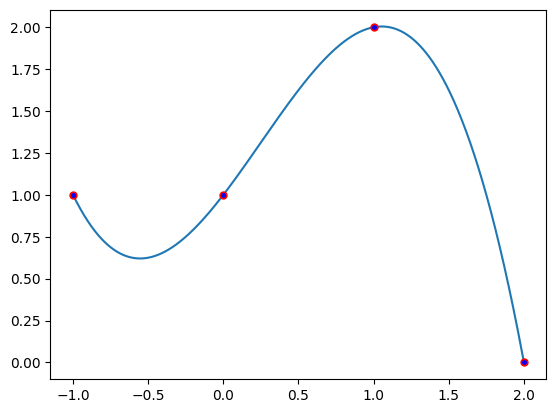

In [24]:
#First define our data points
x0,y0 = -1 ,1
x1,y1 = 0,1
x2,y2 = 1,2
x3,y3 = 2,0

# next define the form of the polynomial interpolant

px = lambda x,c0,c1,c2,c3: c0 + c1*x + c2*x**2 + c3*x**3

# First we will construct the augmented matrix using the interpolating conditions
A = np.array([[1,x0,x0**2,x0**3],[1,x1,x1**2,x1**3],[1,x2,x2**2,x2**3],[1,x3,x3**2,x3**3]])

# Next we will construct the right hand side
b = np.array([y0,y1,y2,y3])

# Next we will solve the system of equations
c0,c1,c2,c3 = LA.solve(A,b)

print(f"c0 = {c0}, c1 = {c1}, c2 = {c2}, c3 = {c3}")

# Next we will plot the interpolant and the data points to verify it passes through them.
x = np.linspace(-1,2,1000)
y = px(x,c0,c1,c2,c3)

plt.plot(x,y)

# Plotting data points
plt.plot(x0, y0, 'ro', markersize=5, fillstyle='full', markerfacecolor='red')
plt.plot(x1, y1, 'ro', markersize=5, fillstyle='full', markerfacecolor='red')
plt.plot(x2, y2, 'ro', markersize=5, fillstyle='full', markerfacecolor='red')
plt.plot(x3, y3, 'ro', markersize=5, fillstyle='full', markerfacecolor='red')

#Passing data points through function and plot to verify solution
d1 = px(x0,c0,c1,c2,c3)
d2 = px(x1,c0,c1,c2,c3)
d3 = px(x2,c0,c1,c2,c3)
d4 = px(x3,c0,c1,c2,c3)

plt.plot(x0, d1, 'bo', markersize=2.5, fillstyle='full', markerfacecolor='blue')
plt.plot(x1, d2, 'bo', markersize=2.5, fillstyle='full', markerfacecolor='blue')
plt.plot(x2, d3, 'bo', markersize=2.5, fillstyle='full', markerfacecolor='blue')
plt.plot(x3, d4, 'bo', markersize=2.5, fillstyle='full', markerfacecolor='blue')

print(f"y0 = {d1}, y1 = {d2}, y2 = {d3}, y3 = {d4}")

plt.show()

## Our soluton works! 
Note that we could have simply used a Vandermonde matrix and solved for the coefficients.

### Next, we will implement the Lagrange basis.

Define the Lagrange polynomials, $L_j(x)$ as polynomials of degree $n$ that satisfy
$$
L_j(x_i) = \begin{cases} 0 , &i \neq j \\ 1, &i = j\end{cases}
$$
Since each polynomial is zero at all other points not itself and one at itself, thus
$$
L_j(x) = \frac{(x-x_0)\cdots(x-x_{j-1})(x-x_{j+1})\cdots(x-x_n)}{(x_j-x_0)\cdots(x_j-x_{j-1})(x_j-x_{j+1})\cdots(x_j-x_n)} = \prod_{i=0 \ i \neq j}^n \frac{(x-x_i)}{(x_j-x_i)}.
$$
So for our given data $y_i$ at abscissae $x_i$ the unique polynomial interpolant of degree at most $n$ can be written as
$$
p(x) = \sum_{j=0}^n y_j L_j(x). \quad (1)
$$
For data $\lbrace (x_i,y_i)\rbrace^n_{i=0}$, we will first compute the barycentric weights
$$
w_j = \frac{1}{\prod^n_{i \neq j} (x_j-x_i)}
$$
where $\rho_j = \prod^n_{i \neq j} (x_j-x_i)$
and the quantities $w_jy_j$ for $j=0,1,2,...n$
Then, given an evaluation point $x$ not equal to one of the data points $\lbrace x_i \rbrace^n_{i=0}$, compute the interpolant
$$
p(x) = \frac{\sum^n_{j=0}\frac{w_jy_j}{(x-x_j)}}{\sum^n_{j=0}\frac{w_j}{(x-x_j)}} \quad (2)
$$

We will implement both formulas for the interpolate (with and without barycentric weights)

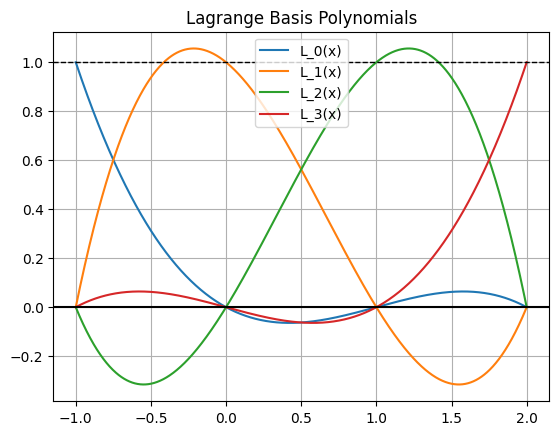

y0 = 1.0, y1 = 1.0, y2 = 2.0, y3 = 0.0


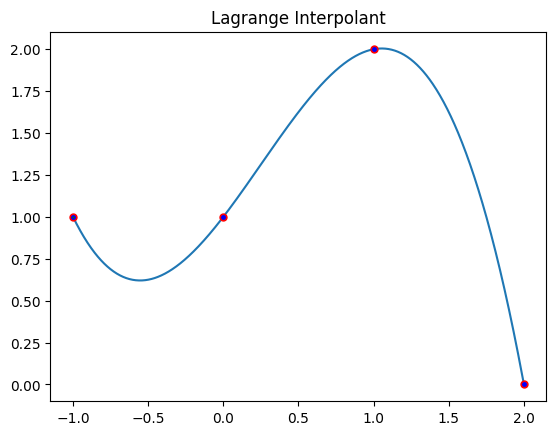

In [25]:
# Define our data points
x0, y0 = -1, 1
x1, y1 = 0, 1
x2, y2 = 1, 2
x3, y3 = 2, 0

data_points = np.array([(x0, y0), (x1, y1), (x2, y2), (x3, y3)])

def Lj(x, j):
    L = 1
    x_j = data_points[j][0]
    for i in range(len(data_points)):
        if i != j:
            x_i = data_points[i][0]
            L *= (x - x_i) / (x_j - x_i)
    return L

# Plotting the Lagrange basis polynomials
x_values = np.linspace(-1, 2, 1000)
for j in range(len(data_points)):
    L_values = [Lj(x, j) for x in x_values]
    plt.plot(x_values, L_values, label=f'L_{j}(x)')

plt.axhline(y=1, color='black', linewidth=1,linestyle='--')
plt.axhline(y=0, color='black', linewidth=1.5,linestyle='-')
plt.title("Lagrange Basis Polynomials")
plt.legend()
plt.grid()
# plt.yticks(np.arange(-1,2,1))
# plt.xticks(np.arange(1,len(data_points),1))
plt.show()

# Construct the interpolant
px = lambda x: sum([data_points[j][1] * Lj(x, j) for j in range(len(data_points))])

#Plot the resulting interpolant
y_values = [px(x) for x in x_values]

plt.plot(x_values, y_values, label='Lagrange Interpolant')

# Plotting data points
plt.plot(x0, y0, 'ro', markersize=5, fillstyle='full', markerfacecolor='red')
plt.plot(x1, y1, 'ro', markersize=5, fillstyle='full', markerfacecolor='red')
plt.plot(x2, y2, 'ro', markersize=5, fillstyle='full', markerfacecolor='red')
plt.plot(x3, y3, 'ro', markersize=5, fillstyle='full', markerfacecolor='red')

# Passing data points through function and plot to verify solution
d1 = px(x0)
d2 = px(x1)
d3 = px(x2)
d4 = px(x3)

plt.plot(x0, d1, 'bo', markersize=2.5, fillstyle='full', markerfacecolor='green')
plt.plot(x1, d2, 'bo', markersize=2.5, fillstyle='full', markerfacecolor='blue')
plt.plot(x2, d3, 'bo', markersize=2.5, fillstyle='full', markerfacecolor='blue')
plt.plot(x3, d4, 'bo', markersize=2.5, fillstyle='full', markerfacecolor='blue')

print(f"y0 = {d1}, y1 = {d2}, y2 = {d3}, y3 = {d4}")


plt.title("Lagrange Interpolant")
plt.show()


We can see we successfully approximated the a polynomial through the data points. Also note how our definition for Lagrange polynomials checks out!

w0 = -0.16666666666666666, w1 = 0.5, w2 = -0.5, w3 = 0.16666666666666666
y0 = 1.0, y1 = 1.0, y2 = 2.0, y3 = 0.0


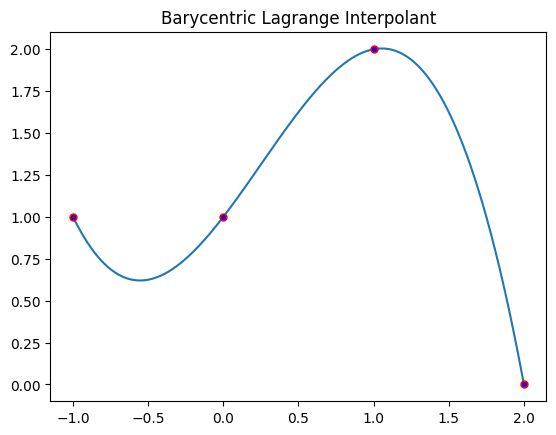

In [26]:
#barycentric method
#Construction:
#First compute the barycentric weights
weights = []

for i in range(len(data_points)):

    xi, _ = data_points[i]
    ρj = 1

    for j in range(len(data_points)):
        if i != j:
            xj, _ = data_points[j]
            ρj *= (xi-xj)

    weights.append(1/ρj)

w0 = weights[0]
w1 = weights[1]
w2 = weights[2]
w3 = weights[3]

print(f"w0 = {w0}, w1 = {w1}, w2 = {w2}, w3 = {w3}")

#Compute w_j * y_j

wy = []

for i in range(len(data_points)):
    _, yi = data_points[i]
    wy.append(weights[i]*yi)

#Evaluation:

#First define the interpolant
def b_px(x):
    numerator, denominator = 0,0

    for j in range(len(data_points)):
        xj, _ = data_points[j]
        if x == xj: ## if x matches one of the known x values in the data points, return the corresponding y value.
            return wy[j] / weights[j] # or data_poits[j][1]
        else:
            numerator += wy[j]/(x-xj)
            denominator += weights[j]/(x-xj)
    return numerator/denominator


#Next we will plot the interpolant and the data points to verify it passes through them.


x_values = np.linspace(-1,2,1000)
y_values = [b_px(x) for x in x_values]

plt.plot(x_values, y_values, label='Interpolant')

# Plotting data points
plt.plot(x0, y0, 'ro', markersize=5, fillstyle='full', markerfacecolor='red')
plt.plot(x1, y1, 'ro', markersize=5, fillstyle='full', markerfacecolor='red')
plt.plot(x2, y2, 'ro', markersize=5, fillstyle='full', markerfacecolor='red')
plt.plot(x3, y3, 'ro', markersize=5, fillstyle='full', markerfacecolor='red')

#Passing data points through function and plot to verify solution
d1 = b_px(x0)
d2 = b_px(x1)
d3 = b_px(x2)
d4 = b_px(x3)

plt.plot(x0, d1, 'bo', markersize=2.5, fillstyle='full', markerfacecolor='green')
plt.plot(x1, d2, 'bo', markersize=2.5, fillstyle='full', markerfacecolor='blue')
plt.plot(x2, d3, 'bo', markersize=2.5, fillstyle='full', markerfacecolor='blue')
plt.plot(x3, d4, 'bo', markersize=2.5, fillstyle='full', markerfacecolor='blue')

print(f"y0 = {d1}, y1 = {d2}, y2 = {d3}, y3 = {d4}")
plt.title("Barycentric Lagrange Interpolant")
plt.show()

Succesful interpoloation!

## Next we implement interpolation using Newton basis

Set

$$
\phi_j(x) = \prod^{j-1}_{i=0}(x-x_i),\quad j=0,1,...n.
$$

Our Newton interpolate

$$
p_n(x) = c_0 + c_1(x-x_0) + c_2(x-x_0)(x-x_1) + ... + c_n(x-x_0)(x-x_1)\cdots(x-x_{n-1})
$$

We define the coefficient of the interpolating polynomial in Newton's form as the the $j$ th divided difference.

$$
f[x_0,x_1,...,x_n] = c_n
$$

The dvided differences is a recurisve formula such that for abritary points
$$
f[x_i] = f(x_i)\\[10pt]
f[x_i,...x_j] = \frac{f[x_{i+1},...,x_j]-f[x_i,...,x_{j-1}]}{x_j-x_i}
$$

Thus, the Newton divided difference interpolation is given by
$$
p_n(x) = f[x_0] + f[x_0,x_1](x-x_0) + f[x_0,x_1,x_2](x-x_0)(x-x_1) + \cdots + f[x_0,x_1,...,x_n](x-x_0)(x-x_1)\cdots(x-x_{n-1}) = \sum^n_{j=0}(f[x_0,x_1,...,x_n]\prod^{j-1}_{i=0}(x-x_i))
$$

To construct an interpolate for a desired function, we make a divided differences table using our data from the problem

\begin{array}{c|c||c c c c}
i & x_i & f[x_i] & f[x_{i-1},x_i] & f[x_{i-2},x_{i-1},x_i] & f[x_{i-3},x_{i-2},x_{i-1},x_i] \\
\hline
0 & -1 & 1 & & & \\[5pt]
1 & 0 & 1 & 0 & & \\[5pt]
2 & 1 & 2 & 1 & \frac{1}{2} & \\[5pt]
3 & 2 & 0 & -2 & -\frac{3}{2} & -\frac{8}{12} \\
\end{array}

Now we can find $p_3$
$$
\begin{align}
p_3(x) &= 1 + 0(x-(-1)) + \frac{1}{2}(x-(-1))(x-0) + -\frac{8}{12}(x-(-1))(x-0)(x-1) \\[10pt]
&= -\frac{8}{12}x^3 + \frac{1}{2}x^2 + \frac{7}{6}x + 1.
\end{align}
$$

Now we will test this method out.




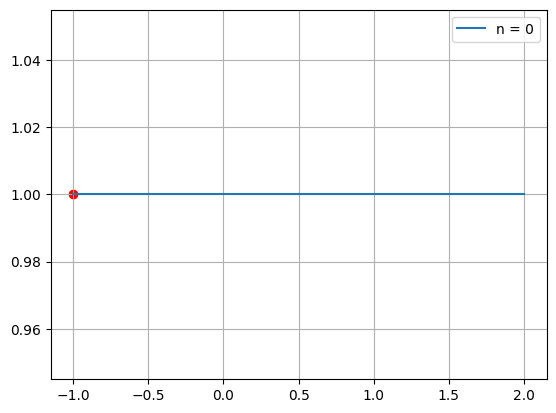

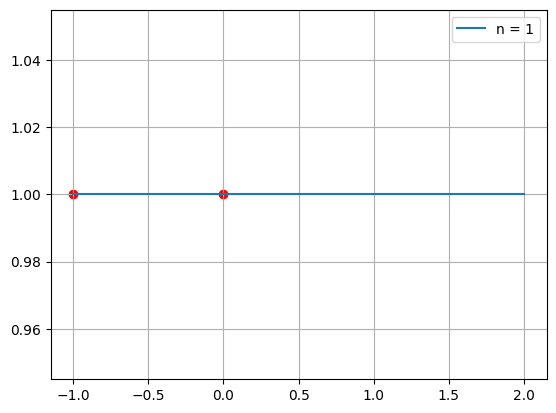

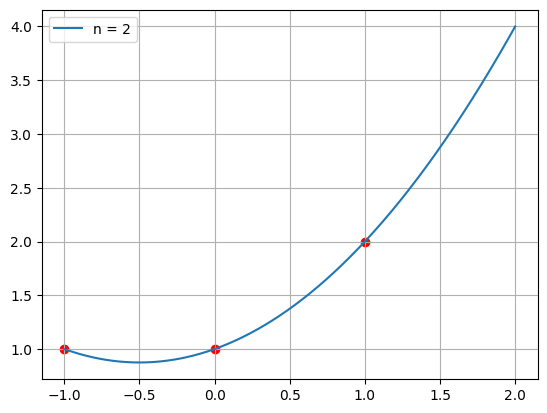

y0 = 1.0, y1 = 1.0, y2 = 2.0, y3 = 0.0
coef = [ 1.          0.          0.5        -0.66666667]


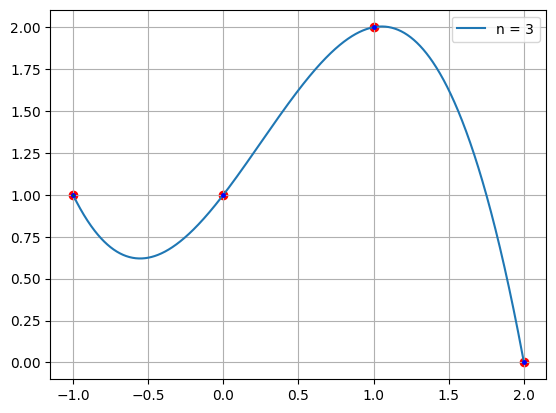

In [27]:
#Define data points
x0, y0 = -1, 1
x1, y1 = 0, 1
x2, y2 = 1, 2
x3, y3 = 2, 0

data_points = np.array([(x0, y0), (x1, y1), (x2, y2), (x3, y3)])
x, y = np.array([x[0] for x in data_points]), np.array([x[1] for x in data_points])

#Compute the constants of the interpolate, that is the divided differences:
def divided_diff_table(x,y):
    n = len(x)
    table = np.zeros((n,n))
    table[:,0] = y # first col is f(xi)=yi

    for j in range(1,n):
        for i in range(n-j):
            table[i,j] = (table[i+1,j-1] - table[i,j-1])/(x[i+j]-x[i])
    return table

#Construct the interpolant polynomial
def px(x, coef, x_data):
    n = len(coef)
    function = coef[0]
    product=1
    for i in range(1,n):
        product *= (x-x_data[i-1])
        function += coef[i]*product
    return function


#We will know construct the newton polynomial interpolant one at data point at a time, plotting at each step.
x_values = np.linspace(-1,2,1000)

for n in range(1,len(data_points)+1):
    coef = divided_diff_table(x[:n],y[:n])[0,:]
    y_values = [px(x_val,coef, x[:n]) for x_val in x_values]
    plt.plot(x_values, y_values, label=f"n = {n-1}")
    
    if n == len(data_points): #Verify the interpolant passes through the data points.

        

        d1 = px(x0,coef,x[:n])
        d2 = px(x1,coef,x[:n])
        d3 = px(x2, coef, x[:n])
        d4 = px(x3, coef, x[:n])

        plt.plot(x0, d1, 'bo', markersize=2.5, fillstyle='full', markerfacecolor='green')
        plt.plot(x1, d2, 'bo', markersize=2.5, fillstyle='full', markerfacecolor='blue')
        plt.plot(x2, d3, 'bo', markersize=2.5, fillstyle='full', markerfacecolor='blue')
        plt.plot(x3, d4, 'bo', markersize=2.5, fillstyle='full', markerfacecolor='blue')
        print(f"y0 = {d1}, y1 = {d2}, y2 = {d3}, y3 = {d4}")
        print(f"coef = {coef}")

    plt.scatter(x[:n],y[:n], color='red')
    plt.legend()
    plt.grid()
    plt.show()




Success!

## 10.8.19

Define the Chebyshev points (roots of the Chebyshev polynomial) along the interval $[-1,1]$  for $n+1$ data abscissae
$$
x_i = \cos(\frac{2i+1}{2(n+1)}\pi), \quad i=0,...,n
$$
But for a general interval $[a,b]$ we apply the affine transformation that maps $[-1,1]$ onto $[a,b]$ to shift and scale the Chebyshev points
$$
x = a + \frac{b-a}{2}(t+1), \quad t \in [-1,1]
$$
and redefine the interpolation abscissae as
$$
x_i \longleftarrow a + \frac{b-a}{2}(x_i+1), \quad i=0,...,n
$$
The maximum absolute value of the polynomial interpolation interval is $2^{-n}$, so the Chebyshev points solve the min-max problem
$$
\beta = \min_{x_0,x_1,...,x_n} \max_{-1\leq x\leq 1} |(x-x_0)(x-x_1)\cdots(x-x_n)|
$$
which yields $\beta = 2^{-n}$, so the interpolation error bound is
$$
\max_{-1 \leq x \leq 1} |f(x) - p_n(x) | \leq \frac{1}{2^n(n+1)!} \max_{-1 \leq t \leq 1} | f^{n+1}(t) | .
$$

We define the Runge function
$$
f(x) =  \frac{1}{1+25x^2},\quad -1 \leq x \leq 1
$$
We will interpolate (using the Lagrange methd) this function at Chebyshev points for $n$ from 10 to 170 in incremenets of 10. We will also denote the spectral accuracy as $\mathcal{O}(q^{-n})$ for some $q>1$.

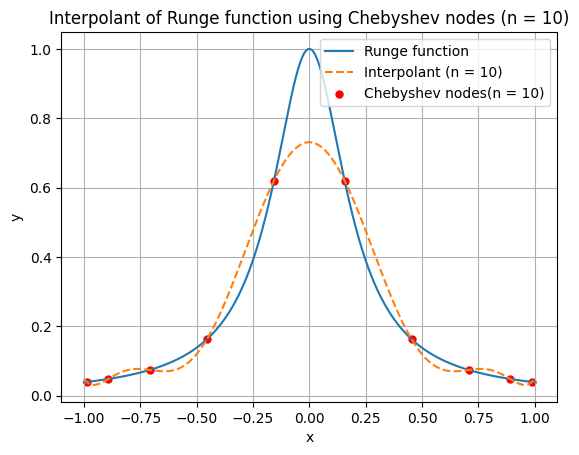

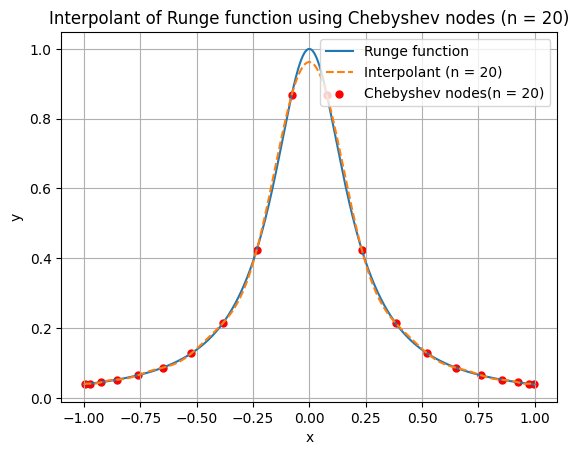

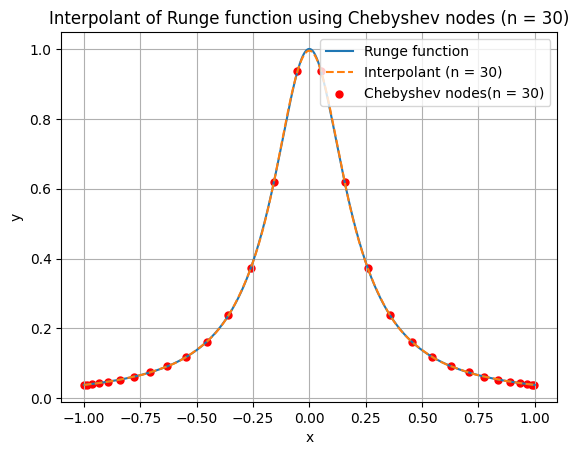

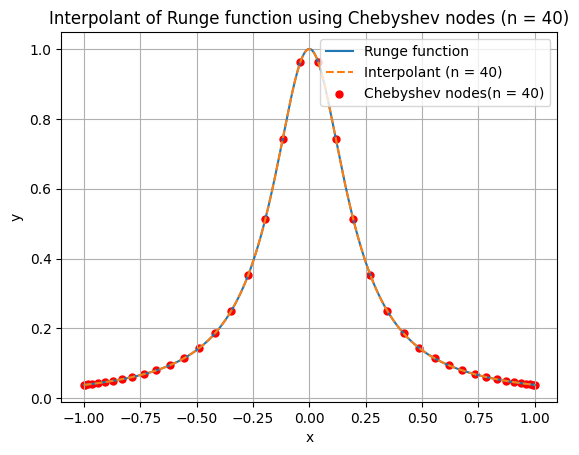

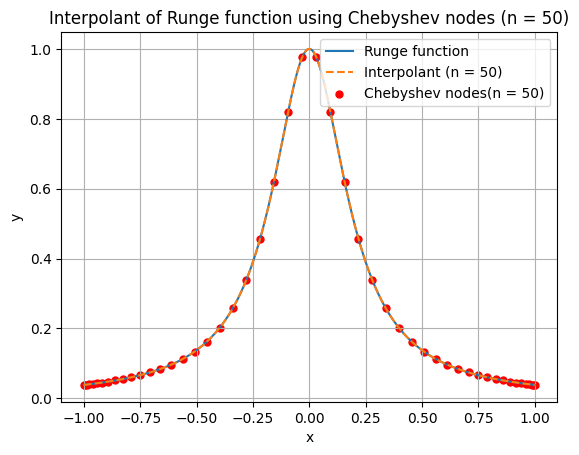

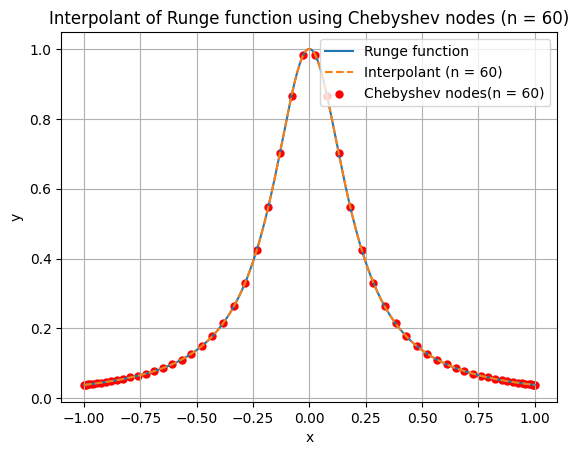

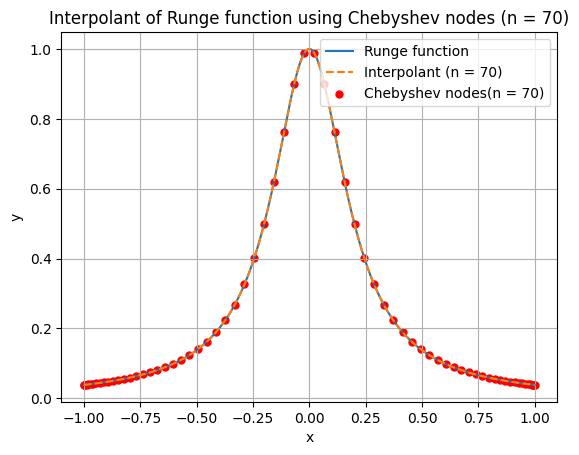

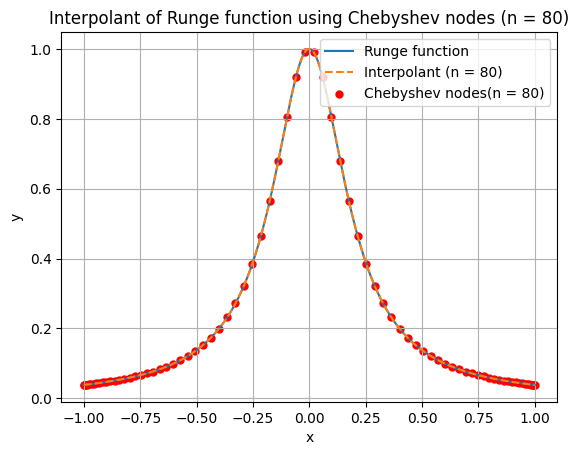

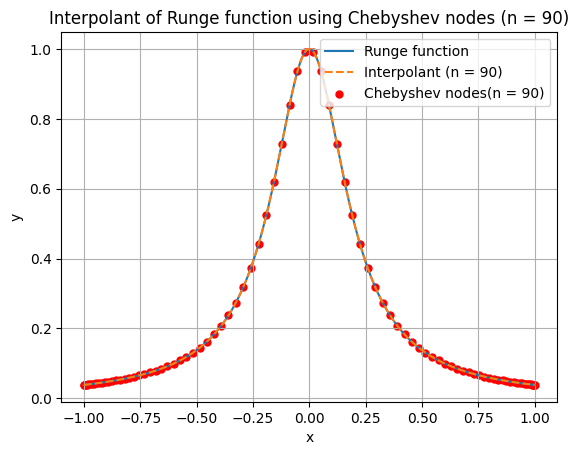

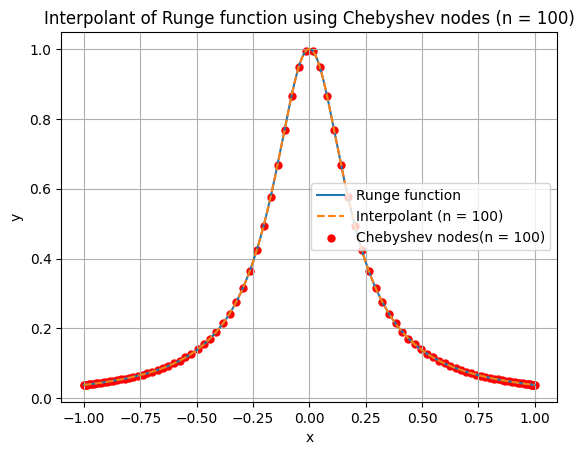

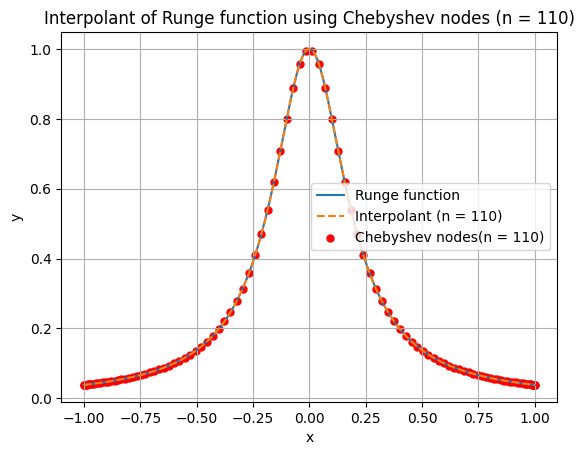

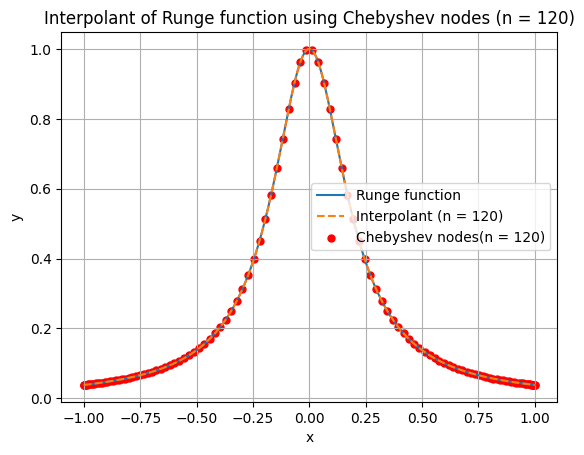

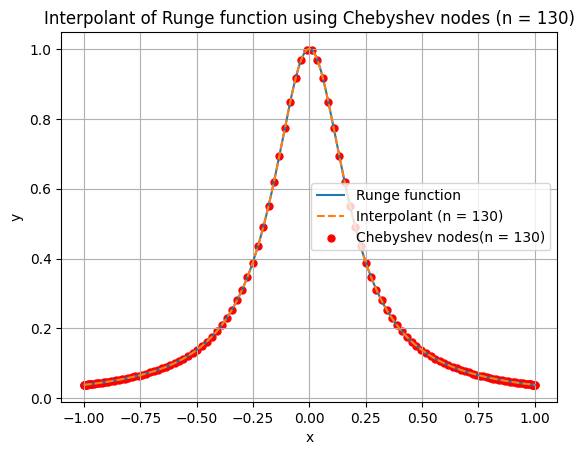

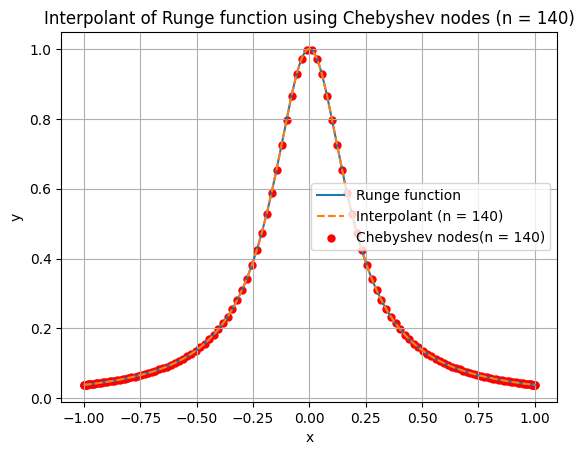

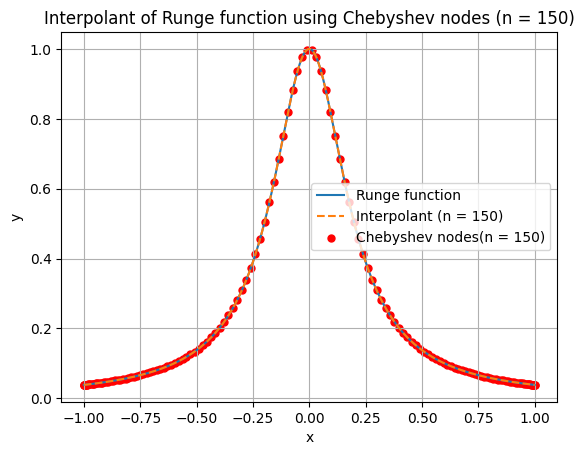

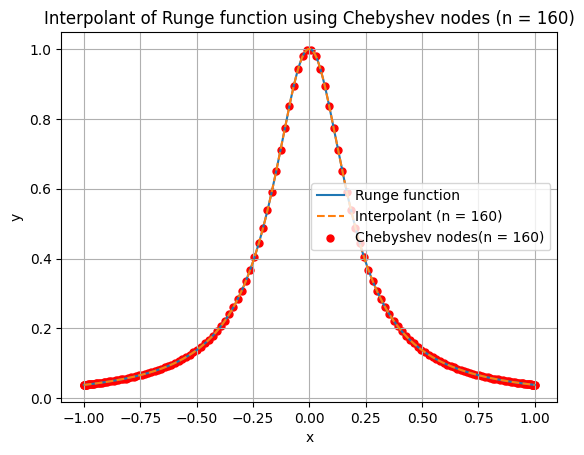

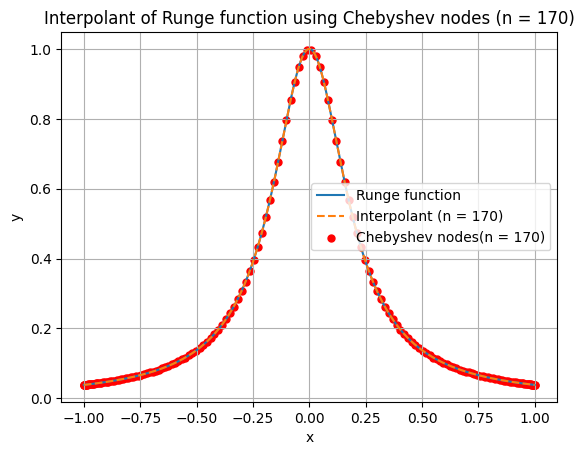

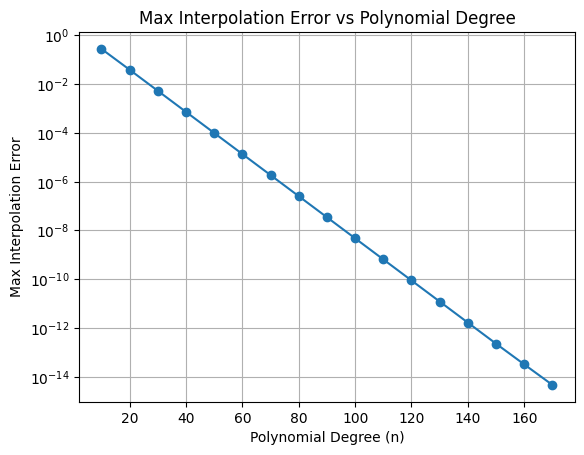

In [41]:
from scipy.interpolate import lagrange as lagrange_interpolate #import the lagrange interpolant from scipy to save code readability and emphasize the Chebyshev method

#define runge:
def runge(x):
    return 1/(1+ (25*x**2))

#Define data
n_values = np.arange(10, 171, 10)
x_uni_mesh = np.arange(-1,1.001,0.001)
y_uni_mesh = runge(x_uni_mesh)
max_errors = []

def barycentric_lg(x,x_cheb,y_cheb,w): #To perform barycentric lagrange interpolation
    num,den=0,0
    for j in range(len(x_cheb)):
        if x == x_cheb[j]:
            return y_cheb[j]
        num += w[j]*y_cheb[j]/(x-x_cheb[j])
        den += w[j]/(x-x_cheb[j])
    return num/den


#Compute max errors
for n in n_values:

    #Construct the Chebyshev nodes
    k = np.arange(n)
    x_cheb = np.cos((2*k+1)*π/(2*n))
    y_cheb = runge(x_cheb)

    #Barycentric weights
    w = np.ones(n)
    for j in range(n):
        for i in range(n):
            if i != j:
                w[j] *= 1 / (x_cheb[j] - x_cheb[i])
    #Compute the interpolant
    y_interpolated = np.array([barycentric_lg(x,x_cheb,y_cheb,w) for x in x_uni_mesh])

    #Compute the error
    max_error = np.max(np.abs(y_uni_mesh - y_interpolated))
    max_errors.append(max_error)

    #Plot the interpolant
    plt.plot(x_uni_mesh,y_uni_mesh,label=f"Runge function")
    plt.plot(x_uni_mesh,y_interpolated,label=f"Interpolant (n = {n})",linestyle='--')
    plt.scatter(x_cheb,y_cheb,s=25,color='red',label=f'Chebyshev nodes(n = {n})')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Interpolant of Runge function using Chebyshev nodes (n = {n})")
    plt.legend()
    plt.grid()
    plt.show()

    

#Plot the errors vs polynomial degree n

plt.semilogy(n_values,max_errors,'-o')
plt.xlabel("Polynomial Degree (n)")
plt.ylabel("Max Interpolation Error")
plt.title("Max Interpolation Error vs Polynomial Degree")
plt.grid()
plt.show()


Clearly, we can see the error decreasing exponentially as n increases. Thus $E(n) = \mathcal{O}(q^{-n})$ for some $q > 1$.

## 11.7.6

Define the $\textit{Gamma function}$ by
$$
\Gamma (x) = \int^{\infin}_0 t^{x-1}e^{-t} dt, \quad x>0
$$
Where it is known that for $n \in \Z$, the function has the value
$$
\Gamma (n) = (n-1)! = 1 \sdot 2 \sdot 3 \cdots (n-1).
$$
So we can utilize the datapoints $(1,1),(2,1),(3,2),(4,6),(5,24)$.
\
(I am assuming they want part a to be a non-piecewise interpolation and part b to be piecewise)

(a) We interpolate using barycentric Lagrange method. In part (b), we will use the Cubic Spline method:
1. Identify $f(x_i) \equiv y_i, i=0,1,...,n$ and set $a_i = y_i, i =0,1,...,n-1$.
2. Construct tridiagonal system of equations for unknowns $c_0, c_1,...,c_n$ using the $n-1$ equations
$$
h_{i-1}c_{i-1}+2(h_{i-1}+h_i)c_i +h_ic_{i+1} = 3(f[x_i,x_{i+1} - f[x_{i-1},x_i]]), \quad i =1,...,n-1
$$
$\quad$ and two more boundary conditions. We pick the free boundary choice yielding the natural spline by setting $c_0 = c_n = 0$.\
$\quad$ So we can write our system

$$
\begin{pmatrix}
2(h_0 + h_1) & h_1 & & &  \\[5pt]
h_1 & 2(h_1 + h_2) & h_2 & &  \\[5pt]
& \ddots & \ddots & \ddots & \\[5pt]
 & & h_{n-3} & 2(h_{n-3} + h_{n-2}) & h_{n-2} \\[5pt]
& & & h_{n-2} & 2(h_{n-2} + h_{n-1})
\end{pmatrix}
\begin{pmatrix}
c_1 \\[5pt] c_2 \\[5pt] \vdots \\[5pt] c_{n-2} \\[5pt] c_{n-1}
\end{pmatrix}
=
\begin{pmatrix}
\psi_1 \\[5pt] \psi_2 \\[5pt] \vdots \\[5pt] \psi_{n-2} \\[5pt] \psi_{n-1}
\end{pmatrix}
$$
$\quad$ where $\psi_i = 3(f[x_i, x_{i+1}] - f[x_{i-1},x_i])$

3. Solve the linear system, obtaining the coefficients $c_i$.
4. Set the coefficients $ d_i, i=0,1,...,n-1 $ by equations
 $$
    d_i = \frac{c_{i+1}-c_i}{3h_i}, \quad i=0,...,n-1;
 $$
 $\quad$ set the coefficients $b_i,i=0,1,...,n-1$ by equations
 $$
   b_i  = f[x_i, x_{i+1}] - \frac{h_i}{3}(2c_i+c_{i+1}),\quad i=0,...,n-1.
 $$
5. The desired spline $v(x)$ is given by
$$
v(x) = s_i(x), \ x_i \leq x \leq x_{i+1}, \quad i=0,1,...n-1,
$$

$\quad$ where $s_i$ are givenby equations 
$$
s_i(x) = a_i + b_i (x-x_i) + c_i(x-x_i)^2 + d_i, \\[5pt]
\dfrac{\partial s}{\partial x} = b_i  +2c_i (x-x_i) +3d_i(x-x_i)^2, \\[5pt]
\dfrac{\partial^2s}{\partial x^2} = 2c_i + 6d_i (x-x_i).
$$
where we must determine the missing $4n$ coefficients $a_i,b_i,c_i, d_i, i=0,1,...,n-1$.

[[1. 1. 0. 0. 0.]
 [1. 4. 1. 0. 0.]
 [0. 1. 4. 1. 0.]
 [0. 0. 1. 4. 1.]
 [0. 0. 0. 1. 1.]]


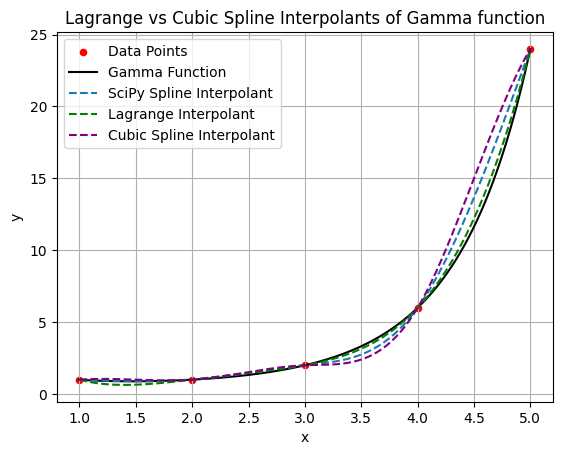

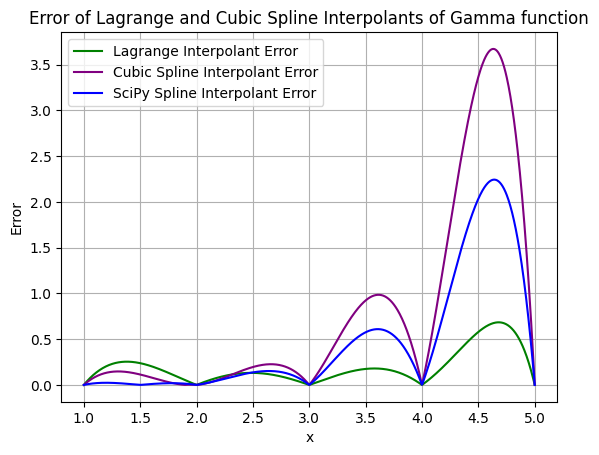

In [117]:
#Define data points
x0, y0 = 1,1
x1, y1 = 2,1
x2, y2 = 3,2
x3, y3 = 4,6
x4, y4 = 5,24

data_points = np.array([(x0, y0), (x1, y1), (x2, y2), (x3, y3), (x4, y4)])
x_points = np.array([x[0] for x in data_points])
y_points = np.array([y[1] for y in data_points])

# Interpolation using non-piecewise method (Lagrange Interpolation)
n = len(data_points)

# Calculate the barycentric weights
w = np.ones(n)
for j in range(n):
    for i in range(n):
        if i != j:
            w[j] *= 1 / (x_points[j] - x_points[i])

def barycentric_lagrange(x, x_points, y_points, w):
    numerator, denominator = 0, 0
    for j in range(len(x_points)):
        if x == x_points[j]:
            return y_points[j]
        numerator += w[j] * y_points[j] / (x - x_points[j])
        denominator += w[j] / (x - x_points[j])
    return numerator / denominator

# Generate the interpolation function over a range of x values
y_lagrange = [barycentric_lagrange(x, x_points, y_points, w) for x in x_values]


#(b) Interpolation Using Piecewise method --> Cubic Spline Interpolation
from scipy.special import gamma as Γ
#y_data = Γ(x_points)

n = len(x_points) - 1  #number of intervals

#construct tridiagonal system of equations
h = np.diff(x_points)
b = np.diff(y_points) / h #first derivative approximations

#build coefficients matrix
A = np.zeros((n+1,n+1))
np.fill_diagonal(A[1:], h[:-1])
np.fill_diagonal(A[:,1:], h[:-1])
np.fill_diagonal(A, 2*(h[:-1] + h[1:]))

#build rhs vector 
ψ_vec = np.zeros(n+1) 
ψ_vec[1:-1] = 3 * (b[1:] - b[:-1])

#Set boundary conditions for natural cubic spline
A[0,0], A[-1,-1] = 1,1
ψ_vec[0], ψ_vec[-1] = 0,0

print(A)

#solve the system to find c_i
c = LA.solve(A,ψ_vec)

#Calculate coefficients a,b,d
a = y_points[:-1] # a_i = y_i
b = b - (h * (2 * c[:-1] + c[1:]) / 3)
d = (c[1:] - c[:-1]) / (3*h)

def spline(x):
    for i in range(n):
        if x_points[i] <= x <= x_points[i+1]:
            dx = x - x_points[i]
            return a[i] + b[i]*dx + c[i]*dx**2 + d[i]*dx**3
    return None
        

y_cubicspline = [spline(x) for x in x_values]


from scipy.interpolate import CubicSpline
cs = CubicSpline(x_points, y_points,bc_type='natural')
y_scipy = cs(x_values)


# (c) Plot interpolants along with gamma function n same graph
x_values = np.linspace(1, 5, 1000)
plt.scatter(x_points, y_points, color='red', label='Data Points',s=20)

#Plot the gamma function
plt.plot(x_values,[Γ(x) for x in x_values], label='Gamma Function', linestyle='-',color='black',linewidth=1.5)

plt.plot(x_values, y_scipy, label='SciPy Spline Interpolant',linestyle='--')

plt.plot(x_values, y_lagrange, label='Lagrange Interpolant',linestyle='--',color='green')

plt.plot(x_values, y_cubicspline, label='Cubic Spline Interpolant',linestyle='--',color='purple')

plt.title("Lagrange vs Cubic Spline Interpolants of Gamma function") 
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

# (d) Plot the errors of the two interpolants on the same graph

#Calculate the errors
error_lagrange = np.abs(y_lagrange - Γ(x_values))
error_cubicspline = np.abs(y_cubicspline - Γ(x_values))
error_scipy = np.abs(y_scipy - Γ(x_values))

plt.plot(x_values, error_lagrange, label='Lagrange Interpolant Error', linestyle='-',color='green')
plt.plot(x_values, error_cubicspline, label='Cubic Spline Interpolant Error', linestyle='-',color='purple')
plt.plot(x_values, error_scipy, label='SciPy Spline Interpolant Error', linestyle='-',color='blue')

plt.xlabel("x")
plt.ylabel("Error")
plt.title("Error of Lagrange and Cubic Spline Interpolants of Gamma function")
plt.legend()
plt.grid()
plt.show()

Notice that the Lagrange interpolationperformsbest with smaller error (though initially cubic spline performs better). The cubic spline's error seems to skyrocket at the end of the range, likely indiciating it is unable to deal with rapidly changing functions like the gamma function.

## 11.7.8

Consider the function
$$
f(x) = e^{3x} \frac{\sin{(200x^2)}}{1+20x^2}, \quad 0 \leq x \leq 1
$$\
We interpolate this function using the cubic splines

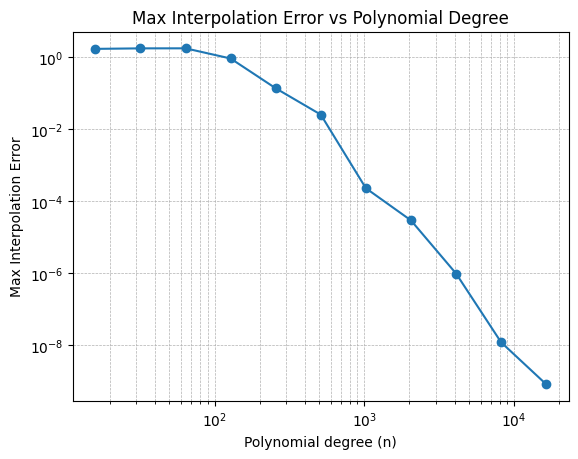

In [125]:
def f(x):
    return np.exp(3*x) * ( np.sin(200*x**2) ) / (1 + 20 * x**2)

def equidistant_points(n):
    return np.linspace(0,1,n+1)

x_uni_mesh = np.arange(0,1.001,0.001)

max_errors = []

for j in range(4,15):
    n = 2**j
    x = equidistant_points(n)
    y = f(x)
    
    spline = CubicSpline(x,y,bc_type='natural')
    y_interpolated = spline(x_uni_mesh)
    y_true = f(x_uni_mesh)
    max_error = np.max(np.abs(y_interpolated - y_true))
    max_errors.append(max_error)


n_values = [2**j for j in range(4,15)]
plt.loglog(n_values,max_errors,'-o')
plt.xlabel("Polynomial degree (n)")
plt.ylabel("Max Interpolation Error")
plt.title("Max Interpolation Error vs Polynomial Degree")
plt.grid(True, which="both", ls="--",lw=0.5)    
plt.show()

At $n=100$, the error starts to decrease exponentially and looks like $\mathcal{O}(q^{-n})$ for some $q>1$. We can see that the interpolation exhibits spectral accuracy.

## 15.7.2

Prove the mean value theorem for integrals:

Assume $g \in C[a,b]$ and that $\psi$ is an integrable function that is either nonnegative or nonpositive throughout the interval $[a,b]$. Then $\exists$ a point $\xi \in [a,b]$ such that

$$
\int^b_a g(x) \psi(x) dx = g(\xi) \int^b_a \psi (x) dx \quad (*)
$$

$\textbf{\textit{\underline{Proof}}}$:

Let $m$ and $M$ be the minimum and maximum values for $g$ on $[a,b]$ respectively. Since $g$ is continuous on the interval $[a,b]$, then these bounds indeed exist. \
Given that $g \in C[a,b]$ and $\psi$ is integrable on $[a,b]$ and either nonnegative or nonpositive thorughout the interval, $\forall \ x \in [a,b]$ it follows that:

$$
m \leq g(x) \leq M.
$$

Then, we can bound the integral $\int^b_a g(x) \psi(x) dx$ by

$$
m \int^b_a \psi(x) dx \leq \int^b_a g(x) \psi(x) dx \leq M \int^b_a \psi(x) dx.
$$

Let $I = \int^b_a \psi(x) dx.\\[10pt]$ 

If $I=0,$ then $\psi(x)$ must be zero almost everywhere on $[a,b] \implies g(x)\psi(x) = 0 \implies \int^b_a g(x) \psi(x) dx = 0$. Since $g$ is continuous and $\psi$ is either non-negative or non-positive along the interval $[a,b]$, it follows that $\exists \ \xi \in [a,b] \ \text{s.t.} \ g(\xi) = 0$ because $g(x) \neq 0 \ \forall \ x \in [a,b] \ \bot \ \int^b_a g(x) \psi(x) dx = 0$.  $\\[5pt]$
But if $I \neq 0$

$$
m \cdot I \leq \int^b_a g(x) \psi(x) dx \leq M \cdot I
$$

Given that $g$ is continuous on $[a,b]$ and  $m \leq g(x) \leq M \  \forall \ x$, by the Intermediate Value Theorem $\exists \ \xi \in [a,b]$ such that $g(\xi) = c.\\$ So
$$
m \leq \frac{\leq \int^b_a g(x) \psi(x)}{I} \leq M
$$
Note that that m and M could be flipped depending on the $+/-$ of  $\psi$. Since $c$ is a value between $m$ and $M$

$$
c = \frac{\int^b_a g(x) \psi(x) dx}{I}
$$
But $g(\xi) =c$, so
$$
g(\xi) = \frac{\int^b_a g(x) \psi(x) dx}{I}
$$

But $ I = \int^b_a \psi(x) dx$, hence

$$
\int^b_a g(x) \psi(x) dx = g(\xi) \int^b_a \psi (x) dx
$$

$\therefore \quad \mathbb{Q.E.D.}$

## 15.7.12

The trapezoidal rule approximates the integral of a function $f(x)$ over the interval $[a,b]$ using
$$
I_{TR}(f;a,b) = \int^b_a f(x) dx \approx \frac{b-a}{2}[f(a)+f(b)]
$$
with error
$$
E(f;a,b) = -\frac{f^{\prime\prime}(\eta)}{12}(b-a)^3
$$
To use this rule for an adaptive quadrature program, we must adapatively refine our interval when our estimates are not within a determined tolerance.$\\$
So our procedure can proceed as follows

1. Compute the integral over $[a,b]$ using trapezoidal rule to retrieve initial estimate
$$
T(a,b) = \frac{b-a}{2}[f(a)+f(b)]
$$
2. Split the interval $[a,b]$ into two halves $[a,m], [b,m]$ where $m = \frac{a+b}{2}$
3. Compute the integrals over the two halves
$$
T(a,m) = \frac{m-a}{2}[f(a)+f(m)] \\[10pt]
T(m,b) = \frac{b-m}{2}[f(a)+f(m)]
$$ 
4. Estimate the error, $E$, by subtracting out initial estimate from our refined estimate which is the sum of the two integrals along the subinterval, which decreases cubically with interval size

$$
E \approx \frac{|T(a,b) - T(a,m) + T(m,b)|}{3}
$$
5. Then we see if our new refined estimate is within our tolerance $\epsilon$
6. Return the refined estimate if it is within the tolerance, otherwise recursively call this algorithim on the two subintervals with half the tolerance


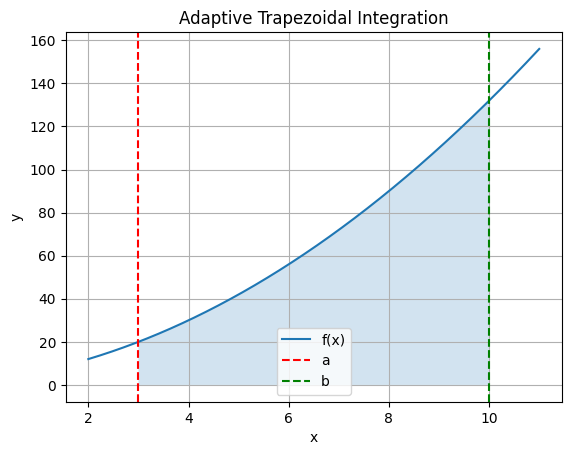

Integral of f(x) from 3 to 10: 474.83333354629576


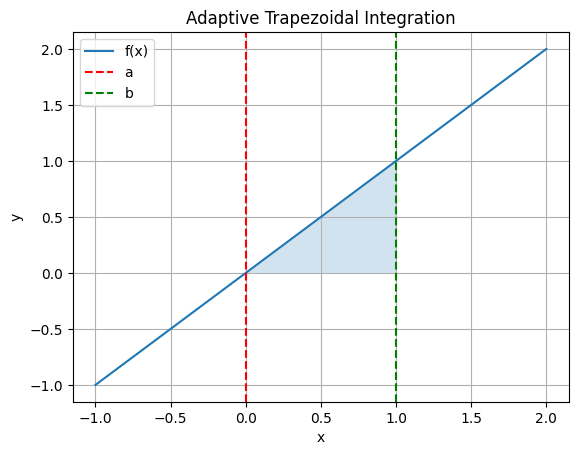

Integral of f(x) from 0 to 1: 0.5


In [142]:
def adapative_trapezoidal(f,a,b,tol):
    
    #First compute the trapezoidal rule for the interval [a,b], our initial estimate
    T_ab = (b-a)/2 * (f(a) + f(b))

    #Split the interval into 2
    m = (a+b)/2
    T_am = (m-a)/2 * (f(a) + f(m))
    T_mb = (b-m)/2 * (f(m) + f(b))

    #Compute the error
    error = np.abs(T_ab - (T_am + T_mb))

    #If the error is less than the tolerance, return the estimate
    if error < tol:
        return T_am + T_mb
    else:
        #Otherwise, recursively apply the trapezoidal rule to the subintervals
        left = adapative_trapezoidal(f,a,m,tol/2)
        right = adapative_trapezoidal(f,m,b,tol/2)
        return left + right


def adaptive_trapezoidal_integration(f,a,b,tol=1e-6):
    return adapative_trapezoidal(f,a,b,tol)

#Function testing
f = lambda x: x**2 + 3*x + 2
a = 3
b = 10
tol = 1e-6

integral = adaptive_trapezoidal_integration(f,a,b,tol)

x_values = np.linspace(a-1,b+1,1000)
y_values = f(x_values)

plt.plot(x_values,y_values,label='f(x)')
plt.fill_between(x_values,0,y_values,where=(x_values >= a) & (x_values <= b),alpha=0.2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Adaptive Trapezoidal Integration")


plt.axvline(x=a, color='r', linestyle='--',label='a')
plt.axvline(x=b, color='g', linestyle='--',label='b')
plt.legend()
plt.grid()
plt.show()
print(f"Integral of f(x) from {a} to {b}: {integral}")


f = lambda x: x
a,b = 0,1
integral = adaptive_trapezoidal_integration(f,a,b,tol)

x_values = np.linspace(a-1,b+1,1000)
y_values = f(x_values)

plt.plot(x_values,y_values,label='f(x)')
plt.fill_between(x_values,0,y_values,where=(x_values >= a) & (x_values <= b),alpha=0.2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Adaptive Trapezoidal Integration")
plt.axvline(x=a, color='r', linestyle='--',label='a')
plt.axvline(x=b, color='g', linestyle='--',label='b')
plt.legend()
plt.grid()
plt.show()
print(f"Integral of f(x) from {a} to {b}: {integral}")



Note the error for adapative trapezoidal rule
$$
E_T = - \frac{(b-a)^3}{12}f^{\prime\prime}(\xi)
$$
 So the error for each subinterval is
$$
E_T(f;a,m) = - \frac{(m-a)^3}{12}f^{\prime\prime}(\xi_1)  \approx \frac{E_T}{8}\\[5pt]

E_T(f;m,b) = - \frac{(b-m)^3}{12}f^{\prime\prime}(\xi_2) \approx \frac{E_T}{8}
$$
$\quad$ So then
$$
E_{split} \approx \frac{E_T}{4}.
$$